# Next-Day Rain Prediction

Prepared by Marvin Rubia [(My LinkedIn)](https://www.linkedin.com/in/marvinrubia08)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## About the dataset

The original source is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

This dataset contains observations of weather metrics for each day from 2008 to 2017 in Sydney, NSW. The **Weather_Data.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | int |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | object  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


__Citation__: The .csv file was prepared by the instructors of IBM's course _Machine Learning with Python_. Thanks to Joseph Santarcangelo, Ph.D. and Svitlana Kramar.

## Load the dataset

In [31]:
url = 'https://raw.githubusercontent.com/marvin-rubia/Next-Day-Rain-Prediction/main/Weather_Data.csv'
df = pd.read_csv(url)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [33]:
df.tail(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3261,6/16/2017,11.9,17.3,0.0,1.6,0.2,WNW,26,W,WSW,...,79,69,1026.2,1023.5,7,7,13.3,17.2,No,No
3262,6/17/2017,13.2,19.1,0.0,1.0,0.2,SSW,26,WNW,SSW,...,81,67,1024.3,1021.8,7,7,14.6,17.4,No,Yes
3263,6/18/2017,11.3,18.0,1.8,2.0,6.3,S,52,SW,SSW,...,83,62,1025.7,1025.8,3,5,12.9,17.6,Yes,No
3264,6/19/2017,11.2,18.3,0.4,2.2,1.9,SSW,37,W,S,...,79,69,1030.4,1028.4,6,7,12.7,17.2,No,Yes
3265,6/20/2017,11.3,20.0,4.4,2.2,5.8,W,26,W,SSW,...,88,60,1028.7,1025.2,6,1,11.9,19.7,Yes,No
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No
3270,6/25/2017,7.6,19.3,0.0,3.4,9.4,W,35,W,W,...,73,32,1018.6,1015.4,1,1,9.4,18.8,No,No


## Data Pre-Processing

#### Replace categorical Yes and No with binary 1 and 0 for RainToday and RainTomorrow columns

In [34]:
df.replace({'Yes':1, 'No':0}, inplace=True)

In [35]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


#### Convert RainToday and RainTomorrow columns to integer

In [36]:
df['RainToday'] = df['RainToday'].astype(int)
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

#### Replace wind directions with dummy variables

In [37]:
# Check how many distinct values for our 3 direction-based features

print(len(df['WindGustDir'].unique()))
print(len(df['WindDir9am'].unique()))
print(len(df['WindDir3pm'].unique()))

16
16
16


In [38]:
# Create a list of distinct directions in alphabetical manner

dir_values = df['WindDir3pm'].unique().tolist()
directions = sorted(dir_values)
directions

['E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW']

In [39]:
# Replace values in our direction-based features

df['WindGustDir'].replace(directions, list(range(1,17)), inplace=True)
                           
df['WindDir9am'].replace(directions, list(range(1,17)), inplace=True)
                          
df['WindDir3pm'].replace(directions, list(range(1,17)), inplace=True)

__NOTE TO SELF__: Direction's Dummy Equivalents are shown below.

In [40]:
data = {'Direction': directions,
       'Dummy': list(range(1,17))}

Dir_Dummies = pd.DataFrame(data)
Dir_Dummies

,Direction,Dummy
0,E,1
1,ENE,2
2,ESE,3
3,N,4
4,NE,5
5,NNE,6
6,NNW,7
7,NW,8
8,S,9
9,SE,10


#### Convert Data column to date type

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
df.dtypes

Date             datetime64[ns]
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int64
WindGustSpeed             int64
WindDir9am                int64
WindDir3pm                int64
WindSpeed9am              int64
WindSpeed3pm              int64
Humidity9am               int64
Humidity3pm               int64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                  int64
Cloud3pm                  int64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int32
RainTomorrow              int32
dtype: object

#### Add a new column called 'Month'

In [43]:
df.insert(1, 'Month', df['Date'].dt.month)
df.tail()

,Date,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3266,2017-06-21,6,8.6,19.6,0.0,2.0,7.8,11,37,14,...,73,52,1025.9,1025.3,2,2,10.5,17.9,0,0
3267,2017-06-22,6,9.3,19.2,0.0,2.0,9.2,14,30,14,...,78,53,1028.5,1024.6,2,2,11.0,18.7,0,0
3268,2017-06-23,6,9.4,17.7,0.0,2.4,2.7,14,24,15,...,85,56,1020.8,1015.0,6,6,10.2,17.3,0,0
3269,2017-06-24,6,10.1,19.3,0.0,1.4,9.3,14,43,14,...,56,35,1017.3,1015.1,5,2,12.4,19.0,0,0
3270,2017-06-25,6,7.6,19.3,0.0,3.4,9.4,14,35,14,...,73,32,1018.6,1015.4,1,1,9.4,18.8,0,0


__Why did we add a Month column?__ Because climate depends on months. Certain months are more susceptible for rainfall than other months.

## Exploring data

In [44]:
# Get only the numerical columns

numerical_columns = df.select_dtypes(include=['int', 'float'])
numerical_columns.head()

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,19.5,22.4,15.6,6.2,0.0,14,41,9,12,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,2,19.5,25.6,6.0,3.4,2.7,14,41,14,1,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,2,21.6,24.5,6.6,2.4,0.1,14,41,3,3,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,2,20.2,22.8,18.8,2.2,0.0,14,41,6,1,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,2,19.7,25.7,77.4,4.8,0.0,14,41,6,14,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


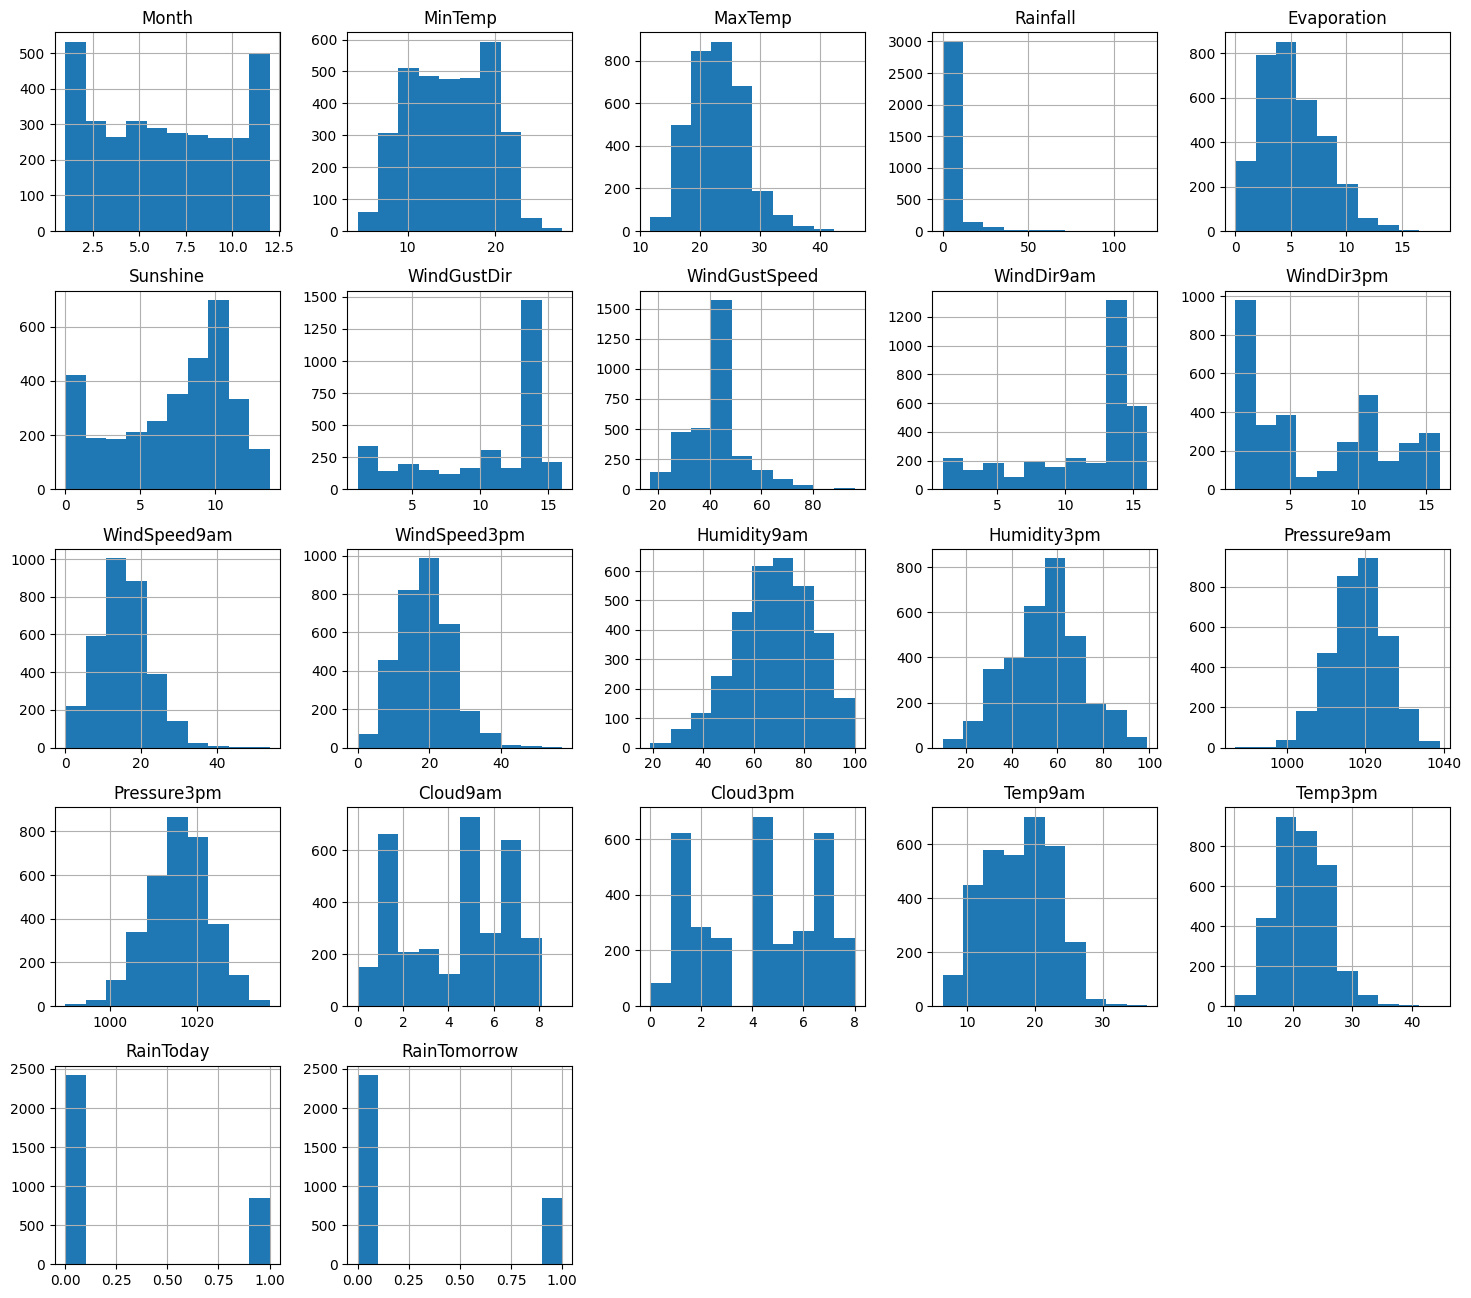

In [25]:
# Plot histograms of numerical columns

numerical_columns.hist(figsize=(18,16))
plt.show()

__Comment__: Excluding categorical __RainToday__ and __RainTomorrow__ columns, the histograms for _continuous_ variables give a mixture of almost-normal distributions and skewed distributions. The key point is that _no feature_ shows a __uniform distribution__, which indicates that the explanatory variable has a constant probability for _any_ of its value, which won't help our model classify whether the response variable is 1 or 0.

In [45]:
# Count the target's distinct values

df['RainTomorrow'].value_counts()

RainTomorrow
0    2422
1     849
Name: count, dtype: int64

__Comment__: About 35% of our target's records are positive class (i.e. raining tomorrow). 

### <font color=red>[Sidenote on RainToday</font>

In [46]:
# Create dataframe for only RainToday and Rainfall columns
df_RToday_RF = df[['RainToday','Rainfall']]

# Show the least RainFall value for records of RainToday = 1
condition = df['RainToday'] == 1
df_RToday_RF[condition].sort_values(by='Rainfall', ascending=True)

,RainToday,Rainfall
403,1,1.2
104,1,1.2
1677,1,1.2
2544,1,1.2
1823,1,1.2
...,...,...
1707,1,95.2
1104,1,99.4
2484,1,105.8
1425,1,109.4


The dataset __confirms__ a rain for the day if the amount of rainfall (in millimeters) is at least 1.2 mm. 

### <font color=red>End of Sidenote]</font>

## Features Selection 

Rainfall is caused by many environmental factors. However, for efficiency, interpretability, and hopefully for better prediction, I am going to use my domain judgment about the science of raining. 

The longer towards the future we are going to predict, the _lower the probability_ of us being accurate. In other words, if it is raining heavily __now__, it is likely that it will continue to rain until 10 minutes later. But it is hard to say if this instance will help us predict whether or not it will continue to rain 7 days later. 

Likewise, even if it is __not yet__ raining, our confidence to use causal factors to predict __when__ it will rain decreases as the time between the observation moment and prediction moment increases. For example, if there is a nimbus cloud right above my place, I might predict that it will rain today. But _that nimbus cloud_ won't help me predict whether or not rain will fall 3 days later in my place. 

With this in mind, if we want to predict whether or not it will rain tomorrow, our causal factors must be closer to tomorrow. So, I am going to __select the 3pm observations of the features and exclude their 9am versions__. 

Note that with this reasoning, our model's ability to predict the rain the next day _partially_ depends on 3pm observations the previous day. Our goal is not to build a model that can predict further into the future, but to build a model that can predict the possibility of rain _tomorrow_ using whatever measurements can be done during work hours (in the weather observatory) from the previous day. 

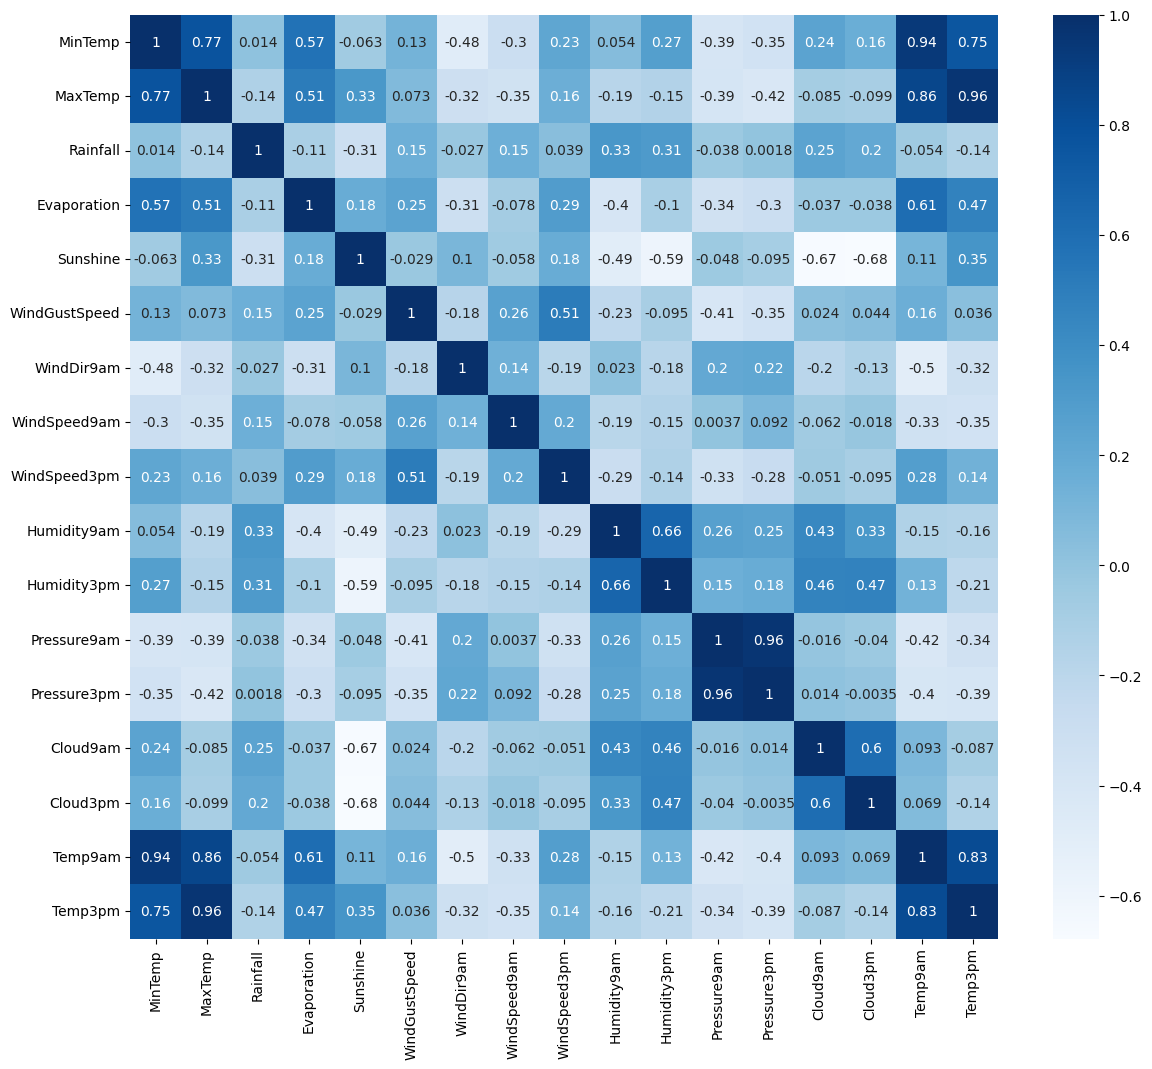

In [48]:
# Check correlations of CONTINUOUS variables

corr_matrix = numerical_columns.drop(['Month', 'WindGustDir', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

__Comment__: From this matrix, we can see that 9am features are highly correlated to its 3pm versions, giving us the confidence that we can exclude the 9am version, as argued earlier. We maintain the 3pm version because that is closer to tomorrow, which our moment of prediction. 

Minimum temperature and maximum temperature are highly correlated with __Temp3pm__ feature. However, I am not going to exclude 2 of these features (and maintain one of them). 

Minimum and maximum temperatures are correlated with the temperature at 3pm by virtue of the weather for that day. For example, if it is a sunny day, we expect the minimum and maximum temperatures to be high. Consequently, the temperature at 3pm on that day is expected to be high. The same reasoning holds for a cold day. 

Nevertheless, I need the __Temp3pm__ feature because it is closer to tomorrow and temperature is a causal factor for moist cloud formation. I will still maintain the minimum and maximum temperatures because these two extremes do not necessarily happen close to 3pm, they can happen between 9am and 3pm. Also, it's possible that the maximum temperature might explain the complexity of weather for that day and help us predict the weather the next day. 

In [49]:
# So now we have a reduced dataframe for analysis:

df_reduced = df[['Month', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                 'WindGustDir', 'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm', 
                 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']]

df_reduced.tail(10)

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
3261,6,11.9,17.3,0.0,1.6,0.2,15,26,16,7,69,1023.5,7,17.2,0,0
3262,6,13.2,19.1,0.0,1.0,0.2,12,26,12,13,67,1021.8,7,17.4,0,1
3263,6,11.3,18.0,1.8,2.0,6.3,9,52,12,28,62,1025.8,5,17.6,1,0
3264,6,11.2,18.3,0.4,2.2,1.9,12,37,9,19,69,1028.4,7,17.2,0,1
3265,6,11.3,20.0,4.4,2.2,5.8,14,26,12,9,60,1025.2,1,19.7,1,0
3266,6,8.6,19.6,0.0,2.0,7.8,11,37,11,20,52,1025.3,2,17.9,0,0
3267,6,9.3,19.2,0.0,2.0,9.2,14,30,3,7,53,1024.6,2,18.7,0,0
3268,6,9.4,17.7,0.0,2.4,2.7,14,24,4,13,56,1015.0,6,17.3,0,0
3269,6,10.1,19.3,0.0,1.4,9.3,14,43,14,19,35,1015.1,2,19.0,0,0
3270,6,7.6,19.3,0.0,3.4,9.4,14,35,14,13,32,1015.4,1,18.8,0,0


### Why do we need the WindGustDir and WindDir3pm features anyway?

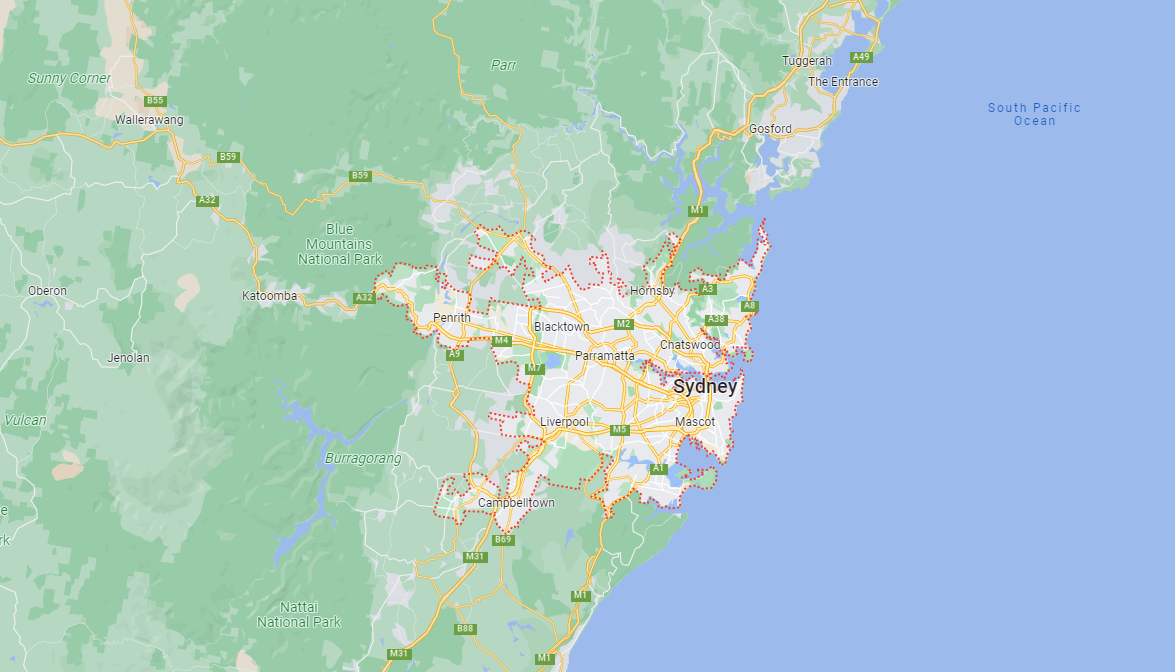

Syndey is the capital city of New South Wales and the most populous city in Australia. And it is surrounded by South Pacific Ocean from the eastern side.

Globally, trade winds affect seasons on Earth. Locally, wind direction is affected by monsoons, which affect rainfall at particular months. So, yes, we need the features on direction. A particular pattern on Sydney's wind direction might help explain the rainfall. 

## Separate Features and the Target

In [50]:
features = df_reduced.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [51]:
features.head()

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday
0,2,19.5,22.4,15.6,6.2,0.0,14,41,12,20,84,1017.4,8,20.9,1
1,2,19.5,25.6,6.0,3.4,2.7,14,41,1,13,73,1016.4,7,24.8,1
2,2,21.6,24.5,6.6,2.4,0.1,14,41,3,2,86,1015.6,8,23.0,1
3,2,20.2,22.8,18.8,2.2,0.0,14,41,1,20,90,1011.8,8,20.9,1
4,2,19.7,25.7,77.4,4.8,0.0,14,41,14,6,74,1004.8,8,25.5,1


## Normalization of Features

Before we do our modelling, we need to normalize the scales of our selected features so that our algorithms treat each of them equally.

In [52]:
scaler = StandardScaler()

normalized_array = scaler.fit_transform(features)
features_scaled = pd.DataFrame(normalized_array, columns=features.columns)

features_scaled.head()

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday
0,-1.285917,1.015126,-0.135078,1.236139,0.371460,-1.878965,0.754698,-0.044081,1.037252,0.094683,1.800202,0.199024,1.586088,-0.149813,1.689014
1,-1.285917,1.015126,0.578719,0.268029,-0.644040,-1.171303,0.754698,-0.044081,-1.166028,-0.844638,1.124391,0.056550,1.171306,0.757924,1.689014
2,-1.285917,1.476258,0.333351,0.328536,-1.006719,-1.852755,0.754698,-0.044081,-0.765432,-2.320714,1.923076,-0.057429,1.586088,0.338969,1.689014
3,-1.285917,1.168837,-0.045853,1.558843,-1.079254,-1.878965,0.754698,-0.044081,-1.166028,0.094683,2.168826,-0.598829,1.586088,-0.149813,1.689014
4,-1.285917,1.059043,0.601025,7.468346,-0.136290,-1.878965,0.754698,-0.044081,1.437848,-1.783959,1.185828,-1.596144,1.586088,0.920852,1.689014


__NOTE TO SELF__: Our source dataframe for train-test split is named __features_scaled__.

## Creat training and testing sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.20, random_state=8)

print(len(X_train), ':', len(y_train))
print(len(X_test), ':', len(y_test))

2616 : 2616
655 : 655


## Machine Learning Modelling

We will use 5 models for classifying rain (or not rain) tomorrow using KNN, Logistic Regression, SVM, DecisionTree, and Random Forest.

### 1. K-Nearest Neighbors (KNN)

In [55]:
# Create our KNN model

knn = KNeighborsClassifier()

# Find the best n_neighbors parameter using GridSearchCV

param_grid_knn = {'n_neighbors': list(range(1,51))}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)

grid_search_knn.fit(X_train, y_train)

# Print the best parameter and accuracy score
print("Best k:", grid_search_knn.best_params_['n_neighbors'])
print("Best score:", grid_search_knn.best_score_)

# Assign the best KNN model
knn_final = grid_search_knn.best_estimator_
knn_final

Best k: 19
Best score: 0.8341073956767329


KNeighborsClassifier(n_neighbors=19)

In [56]:
# Evaluate our model

y_pred_KNN = knn_final.predict(X_test)

report = classification_report(y_test, y_pred_KNN)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       477
           1       0.77      0.46      0.57       178

    accuracy                           0.82       655
   macro avg       0.80      0.70      0.73       655
weighted avg       0.81      0.82      0.80       655



### 2. Logistic Regression

In [57]:
# Create our Logistic Regression model

log_reg = LogisticRegression(solver='liblinear')

# Find the best C parameter using GridSearchCV

param_grid_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_LR = GridSearchCV(log_reg, param_grid_LR, cv=5)

grid_search_LR.fit(X_train, y_train)

# Print the best parameter and accuracy score
print("Best C:", grid_search_LR.best_params_['C'])
print("Best score:", grid_search_LR.best_score_)

# Assign the best Logistic Regression model
log_reg_final = grid_search_LR.best_estimator_
log_reg_final

Best C: 10
Best score: 0.8375417803920424


LogisticRegression(C=10, solver='liblinear')

In [58]:
# Evaluate our model

y_pred_LR = log_reg_final.predict(X_test)

report = classification_report(y_test, y_pred_LR)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       477
           1       0.78      0.57      0.66       178

    accuracy                           0.84       655
   macro avg       0.82      0.75      0.78       655
weighted avg       0.83      0.84      0.83       655



### 3. Support Vector Machine 

In [59]:
# Create our SVM model

svm = SVC()

# Find the best C parameter using GridSearchCV

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

grid_search_svm.fit(X_train, y_train)

# Print the best parameter and accuracy score

print('Best C:', grid_search_svm.best_params_['C'])
print('Best score:', grid_search_svm.best_score_)

# Assign the best SVM model
svm_final = grid_search_svm.best_estimator_
svm_final

Best C: 1
Best score: 0.8386868185599814


SVC(C=1)

In [61]:
# Evaluate our model

y_pred_svm = svm_final.predict(X_test)

report = classification_report(y_test, y_pred_svm)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       477
           1       0.84      0.48      0.61       178

    accuracy                           0.84       655
   macro avg       0.84      0.72      0.75       655
weighted avg       0.84      0.84      0.82       655



### 4. Decision Tree 

In [62]:
# Create our DTC model

dtc = DecisionTreeClassifier()

# Find the best max_depth parameter using GridSearchCV

param_grid_dtc = {'max_depth': list(range(1, 11))}

grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5)

grid_search_dtc.fit(X_train, y_train)

# Print the best parameter and accuracy score
print('Best max_depth:', grid_search_dtc.best_params_['max_depth'])
print('Best score:', grid_search_dtc.best_score_)

# Assign our best DTC model
dtc_final = grid_search_dtc.best_estimator_
dtc_final

Best max_depth: 3
Best score: 0.8237779691445418


DecisionTreeClassifier(max_depth=3)

In [63]:
# Evaluate our model

y_pred_dtc = dtc_final.predict(X_test)

report = classification_report(y_test, y_pred_dtc)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       477
           1       0.72      0.44      0.55       178

    accuracy                           0.80       655
   macro avg       0.77      0.69      0.71       655
weighted avg       0.79      0.80      0.78       655



### 5. Random Forest

In [65]:
# Create our Random Forest model

rf = RandomForestClassifier()

# Find the best max_features parameter using GridSearchCV

param_grid_rf = {'max_features': list(range(1,16))}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

grid_search_rf.fit(X_train, y_train)

# Print the best parameter and accuracy score
print('Best max_features:', grid_search_rf.best_params_['max_features'])
print('Best score:', grid_search_rf.best_score_)

# Assign our best rf model
rf_final = grid_search_rf.best_estimator_
rf_final

Best max_features: 9
Best score: 0.8413651423817378


RandomForestClassifier(max_features=9)

In [66]:
# Evaluate our model

y_pred_rf = rf_final.predict(X_test)

report = classification_report(y_test, y_pred_rf)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       477
           1       0.78      0.56      0.65       178

    accuracy                           0.84       655
   macro avg       0.81      0.75      0.77       655
weighted avg       0.83      0.84      0.83       655



## Comparison of Models

Since our dataset is imbalanced (only 35% of the records indicate raining tomorrow), let's judge our models using the weighted f1-score. 

In case of a tie, we compare their recall scores. Why recall (not precision)? Because we want to _minimize false negatives_. In other words, if we forecast _not_ raining tomorrow, people won't bring umbrellas, so we better be more accurate about that forecast. 

And in case of a tie again, we compare their accuracy scores. 

In [67]:
data = {'KNN': [0.80, 0.82, 0.82],
        'LogReg': [0.83, 0.84, 0.84],
        'SVM': [0.82, 0.84, 0.84],
        'DTC': [0.78, 0.80, 0.80],
        'RF': [0.83, 0.84, 0.84]}

clf_scores = pd.DataFrame(data)
clf_scores.index = ['weighted f1', 'weighted recall', 'accuracy']
clf_scores

,KNN,LogReg,SVM,DTC,RF
weighted f1,0.80,0.83,0.82,0.78,0.83
weighted recall,0.82,0.84,0.84,0.80,0.84
accuracy,0.82,0.84,0.84,0.80,0.84


Our best two models (tied for f1, recall, _and_ accuracy) are __Logistic Regression__ and __Random Forest__. Meanwhile, Decision Tree model performed the weakest for our dataset. 

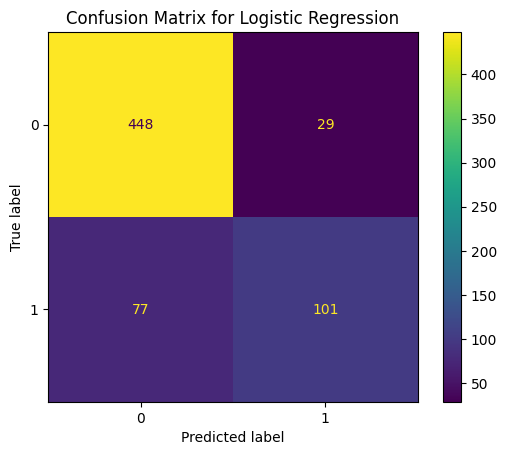

In [68]:
# Create the confusion matrix for our Logistic Regression model

cm = confusion_matrix(y_test, y_pred_LR)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

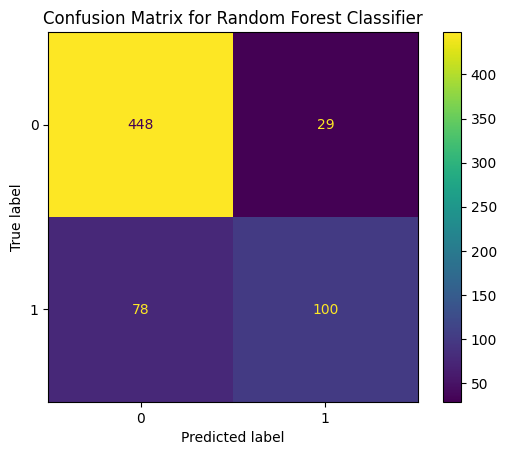

In [69]:
# Create the confusion matrix for our Random Forest Classifier model

cm = confusion_matrix(y_test, y_pred_rf)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## Conclusion

Out of the five models analyzed for Sydney's historical weather data from 2008 to 2017, our best models for predicting next-day raining are Logistic Regression ('C' parameter is equal to 10, the rest of the parameters are default) and Random Forest Classifier ('max_feature' parameter is equal to 1, the rest of the parameters are default). The weighted f1-score for both models are equal at 0.83.

In [118]:
data = {'Logistic Regression': [0.83, 0.84, 0.84],
        'Random Forest': [0.83, 0.84, 0.84]}

clf_scores = pd.DataFrame(data)
clf_scores.index = ['weighted f1', 'weighted recall', 'accuracy']
clf_scores

,Logistic Regression,Random Forest
weighted f1,0.83,0.83
weighted recall,0.84,0.84
accuracy,0.84,0.84
